In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

IBMQ.load_account()

/home/note/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

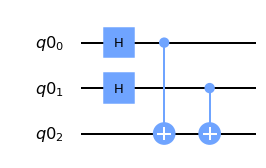

In [2]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

def ccheck(a, b, c):
    qc.cx(q[a], q[c])
    qc.cx(q[b], q[c])

qc.h(q[0])
qc.h(q[1])
ccheck(0,1,2)
qc.draw(output='mpl')


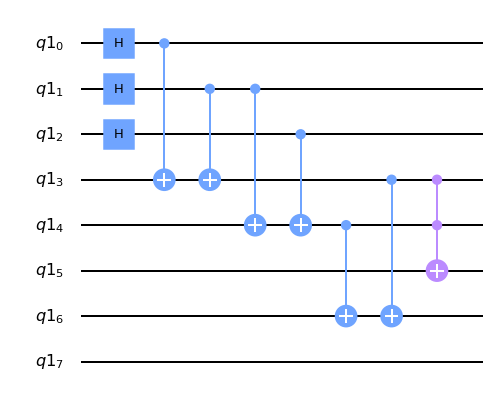

In [3]:
q = QuantumRegister(8)
qc = QuantumCircuit(q)

def hadder(a,b,s,c):
    #xor
    qc.cx(q[b],q[s])
    qc.cx(q[a],q[s])
    #and
    qc.ccx(q[a],q[b],q[c])
    
qc.h(q[0:3])
ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)

qc.draw(output='mpl')

{'0': 75283, '1': 24717}


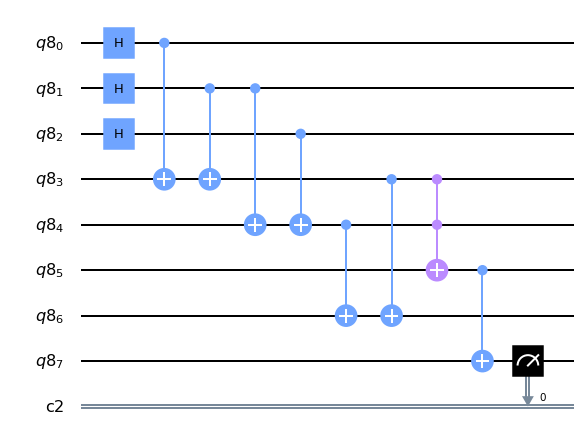

In [6]:
# full oracle
q = QuantumRegister(8)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.h(q[0:3])
ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)
qc.cx(q[5], q[7])
qc.measure(q[7], c[0])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 100000)
result = job.result()
count = result.get_counts()
print(count)
qc.draw(output='mpl')

{'0000000': 111, '0000001': 122, '0000010': 146, '0000011': 129, '0000100': 111, '0000101': 124, '0000110': 129, '0000111': 128}


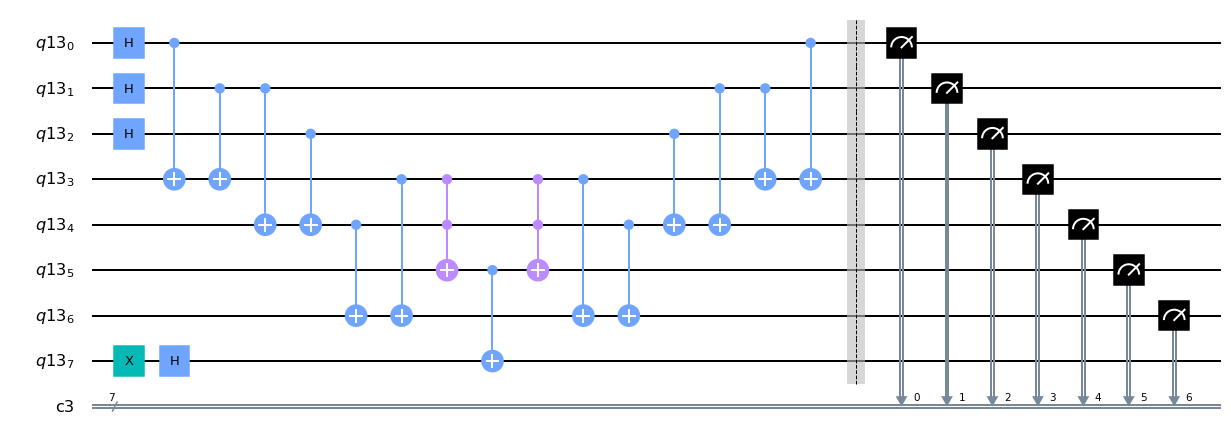

In [7]:
q = QuantumRegister(8)
c = ClassicalRegister(7)
qc = QuantumCircuit(q, c)

def iccheck(a, b, c):
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c])
def ihadder(a, b, s, c):
    qc.ccx(q[a], q[b], q[c])
    qc.cx(q[a], q[s])
    qc.cx(q[b], q[s])
    
qc.h(q[0:3])
qc.x(q[7])
qc.h(q[7])
ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)
qc.cx(q[5], q[7])
ihadder(3,4,6,5)
iccheck(1,2,4)
iccheck(0,1,3)
qc.barrier()
qc.measure(q[0:7], c[0:7])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1000)
result = job.result()
count = result.get_counts()
print(count)
qc.draw(output = 'mpl')


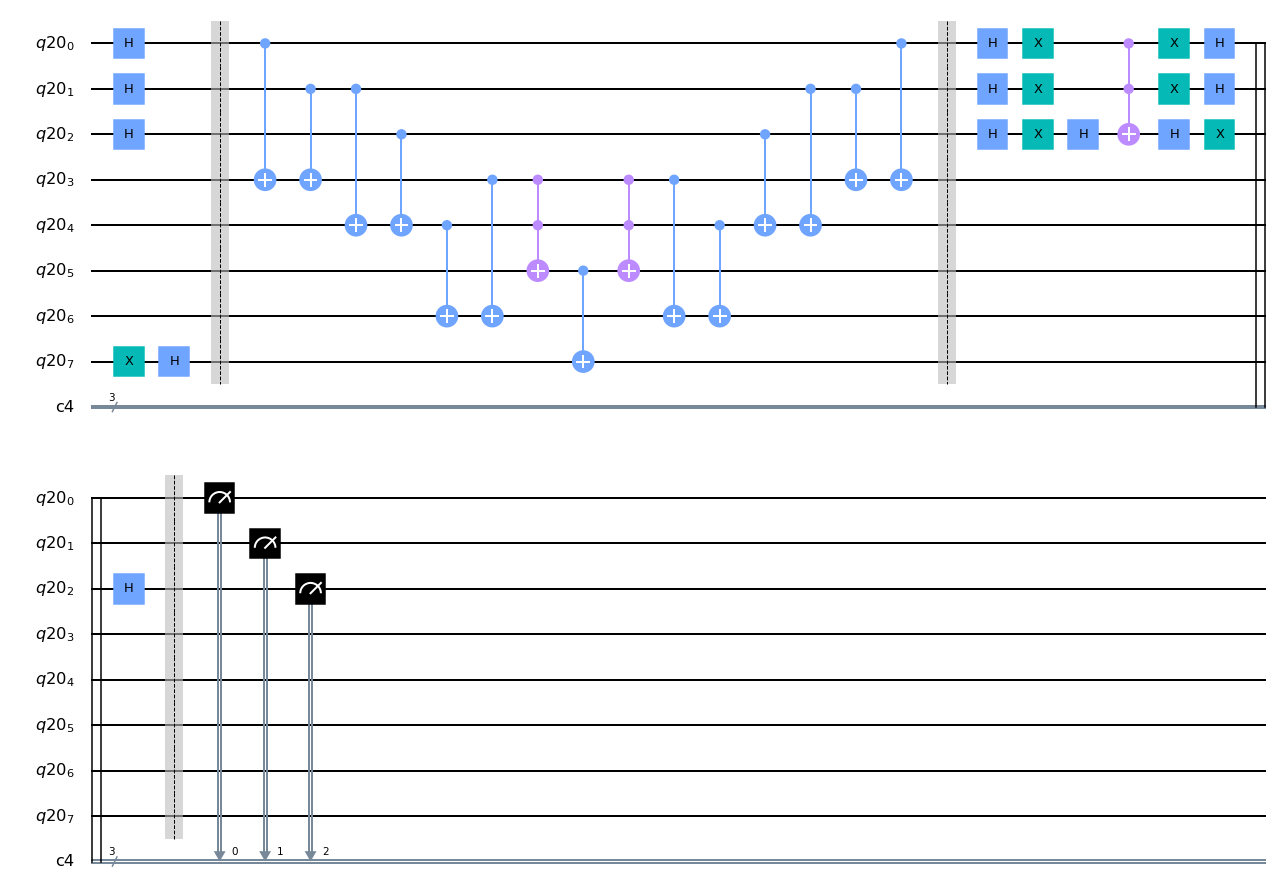

In [9]:
q = QuantumRegister(8)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

def diffusion(a,b,c):
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[c])
    qc.ccx(q[a], q[b], q[c])
    qc.h(q[c])
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])
    
    
qc.h(q[0:3])
qc.x(q[7])
qc.h(q[7])
qc.barrier()

ccheck(0,1,3)
ccheck(1,2,4)
hadder(3,4,6,5)
qc.cx(q[5], q[7])
ihadder(3,4,6,5)
iccheck(1,2,4)
iccheck(0,1,3)
qc.barrier()

diffusion(0,1,2)
qc.barrier()
qc.measure(q[0:3], c[0:3])
qc.draw('mpl')

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 10000)
result = job.result()
count = result.get_counts()
print(count)

{'010': 5114, '101': 4886}
